# Uber Trips Analysis using Python



By analyzing Uber trips, we can draw many patterns like which day has the highest and the lowest trips or the busiest hour for Uber and many other patterns. The dataset I’m using here is based on Uber trips from New York, a city with a very complex transportation system with a large residential community.




The dataset contains data of about 4.5 million uber pickups in New York City from April to September and 14.3 million pickups from January to June 2015

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
uber = pd.read_csv("C:/Users/kariu/OneDrive/Desktop/Data Science/Uber Trip Analysis/uber-raw-data.csv")
uber.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
uber["Date/Time"].unique()

array(['9/1/2014 0:01:00', '9/1/2014 0:03:00', '9/1/2014 0:06:00', ...,
       '9/30/2014 3:01:00', '9/30/2014 3:07:00', '9/30/2014 3:26:00'],
      dtype=object)

In [4]:
uber[['Date', 'Time']] = uber['Date/Time'].str.split(" ", expand=True)
uber.head()

,Date/Time,Lat,Lon,Base,Date,Time
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,9/1/2014,0:01:00
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,9/1/2014,0:01:00
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,9/1/2014,0:03:00
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512,9/1/2014,0:06:00
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512,9/1/2014,0:11:00


In [8]:
uber["Date"] = uber["Date"].map(pd.to_datetime) 
uber["Time"] = uber["Time"].map(pd.to_datetime) 

In [9]:
uber.head()

,Date/Time,Lat,Lon,Base,Date,Time,Day,Weekday
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,2014-09-01,2023-05-15 00:01:00,1,0
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,2014-09-01,2023-05-15 00:01:00,1,0
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,2014-09-01,2023-05-15 00:03:00,1,0
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512,2014-09-01,2023-05-15 00:06:00,1,0
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512,2014-09-01,2023-05-15 00:11:00,1,0


In [10]:
uber["Day"] = uber["Date"].apply(lambda x: x.day)
uber["Weekday"] = uber["Date"].apply(lambda x: x.weekday())
uber["Hour"] = uber["Time"].apply(lambda x: x.hour)

uber.head()

,Date/Time,Lat,Lon,Base,Date,Time,Day,Weekday,Hour
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512,2014-09-01,2023-05-15 00:01:00,1,0,0
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512,2014-09-01,2023-05-15 00:01:00,1,0,0
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512,2014-09-01,2023-05-15 00:03:00,1,0,0
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512,2014-09-01,2023-05-15 00:06:00,1,0,0
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512,2014-09-01,2023-05-15 00:11:00,1,0,0


In [11]:
uber.drop('Date/Time', inplace=True, axis=1)
uber.head()

,Lat,Lon,Base,Date,Time,Day,Weekday,Hour
0,40.2201,-74.0021,B02512,2014-09-01,2023-05-15 00:01:00,1,0,0
1,40.7500,-74.0027,B02512,2014-09-01,2023-05-15 00:01:00,1,0,0
2,40.7559,-73.9864,B02512,2014-09-01,2023-05-15 00:03:00,1,0,0
3,40.7450,-73.9889,B02512,2014-09-01,2023-05-15 00:06:00,1,0,0
4,40.8145,-73.9444,B02512,2014-09-01,2023-05-15 00:11:00,1,0,0


<AxesSubplot:xlabel='Day', ylabel='Density'>

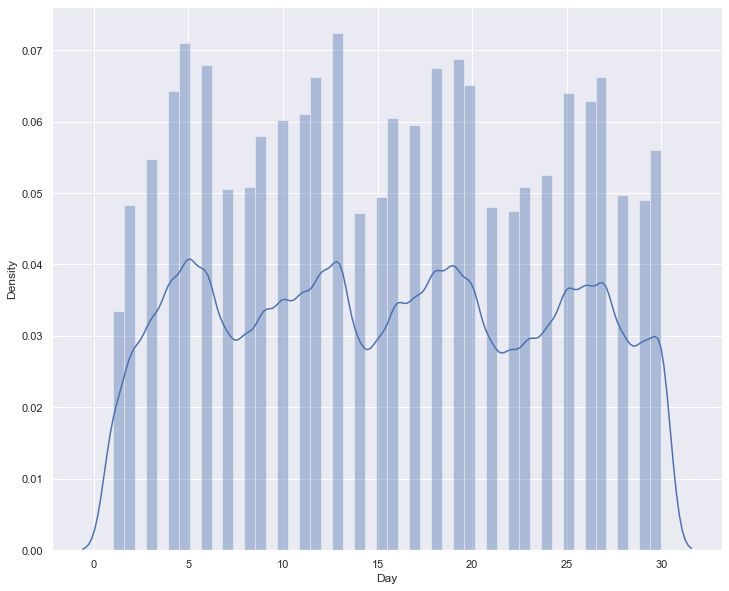

In [12]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(uber["Day"])

<AxesSubplot:xlabel='Weekday', ylabel='Density'>

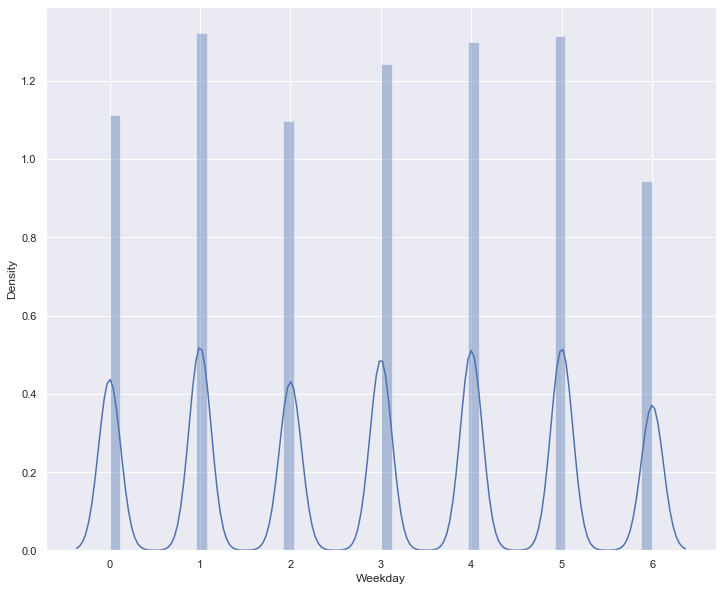

In [13]:
sns.distplot(uber["Weekday"])

***By looking at the daily trips we can say that the Uber trips are rising on the working days and decreases on the weekends.***

***0 indicates Sunday. On Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest.***

<AxesSubplot:xlabel='Time', ylabel='Density'>

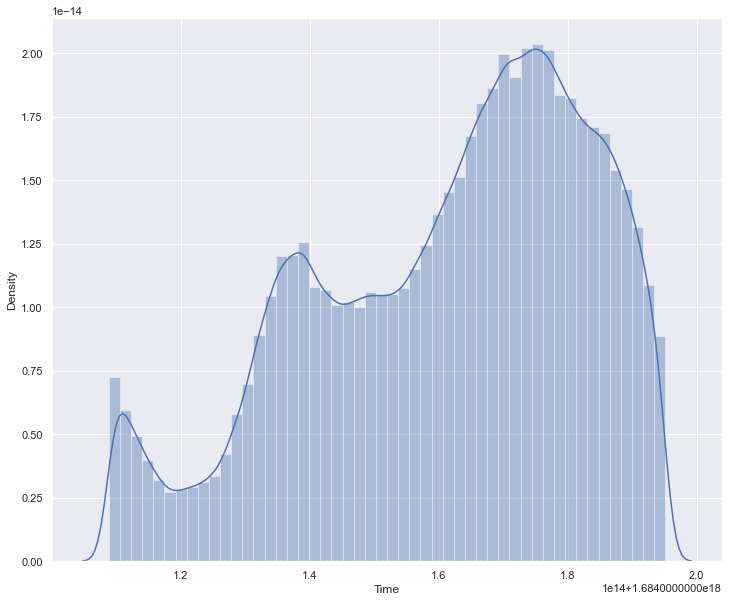

In [14]:
uber["Hour"] = uber["Time"].apply(lambda x: x.hour)

sns.distplot(uber["Time"])

***According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am and the trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing***

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

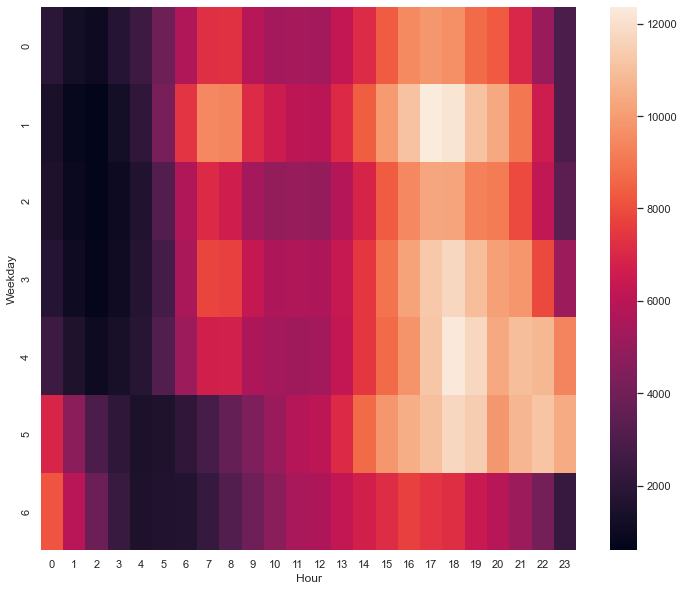

In [15]:
# Correlation of Weekday and Hour
correlation = uber.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
correlation = correlation.unstack()
sns.heatmap(correlation, annot=False)

***As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city***

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


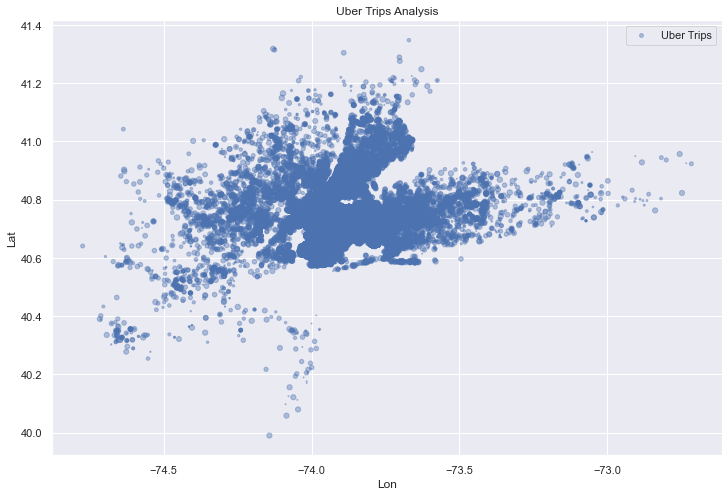

In [17]:
uber.plot(kind='scatter', 
          x='Lon', 
          y='Lat', 
          alpha=0.4, 
          s=uber['Day'], 
          label='Uber Trips',
          figsize=(12, 8), 
          cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

## Summary

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:


* Monday is the most profitable day for Uber
* On Saturdays less number of people use Uber
* 6 pm is the busiest day for Uber
* On average a rise in Uber trips start around 5 am.
* Most of the Uber trips originate near the Manhattan region in New York.